# Project:-Investigate a Dataset - TMDb Movie Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id=intro></a>
## Introduction

### Dataset Description
This data set contains information about 10000 movies collected from The Movie Database (TMDb) including user ratings and revenue
- id - Unique id for each entry
- imdb_id - IMDb id for each movie
- popularity - The popularity rating of each movie
- budget - The amount dedicated for the production of the movie
- revenue - The amount derived after production of the movie
- original_title - The original title of each movie
- cast - The casts that appeared in the movie
- homepage - The homepage of the movie
- director - The name of the director that directed the movie
- tagline - Short introduction about the movie
- keywords - Keywords associated with the movie
- overview - Storyline of the movie
- runtime - The duration of the movie
- genres - The classes that the movie belongs
- production_companies - The companies that produced the movie
- release_date - The date that the movie was released
- vote_count - The number of votes that the movie got
- vote_average - The average vote for a particular movie
- release_year - The year that the movie was released in
- budget_adj - The budget in terms of 2010 dollars
- revenue_adj - The revenue in terms of 2010 dollars

### Questions for Analysis
1. Which 5 genres are dominating the movie industry?
2. Are these genres making most of the profits in the movie industry?
3. What percentage of success does these movie genres take in the movie industry?
4. Are these genres the most popular?
5. Whats the relationship between a movie's popularity and its revenue?
6. Which 5 directors would you recommend to your friend? And why?

#### Import necessariy libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

**Gather the data to use for our analysis**

In [2]:
# Use pandas 'read_csv()' function to load in the csv file that holds our data
tmdb_data = pd.read_csv('tmdb-movies.csv')

# Confirm the operation by displaying the first five records with pandas 'head()' function
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# How many records and columns do we have in this data
shape = tmdb_data.shape
print('We have ', shape[0], 'records and ', shape[1], 'attributes in the TMDb Movies Dataset')

We have  10866 records and  21 attributes in the TMDb Movies Dataset


**Assess the data for analysis**

In [4]:
# What are the attributes we have in these dataset are they all needed for our analysis?
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Clean the data for analysis**

- I will remove *id* attribute leaving imdb_id as the unique identifier.

In [5]:
# Remove 'id' attribute from the data
tmdb_data.drop('id', axis=1, inplace=True)

# A custom function to check if attribute removal is successful
def check_attribute_status(attr_names:list):
    # Get the attributes in the dataset we're working with
    attributes = tmdb_data.columns

    # Loop through the list of attributes supplied
    for i in attr_names:
        # Checks if the attribute is in the dataset
        state = i in attributes

        # Print out a text stating if the attribute is in the dataset or not
        print(i, 'attribute in the dataset?', state)
    

# Check if we have indeed removed the column
check_attribute_status(['id']) # Should return False

id attribute in the dataset? False


- I will remove *cast, homepage, tagline, keywords, overview, release_date, budget_adj and revenue_adj* attributes from the dataset as I don't need them for my analysis

In [6]:
# Remove 'homepage, tagline, keywords, overview, release_date, budget_adj and revenue_adj' attributes from the dataset
tmdb_data.drop(columns=['cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], inplace=True)

# Validate the operation by checking if they are still in the dataset
check_attribute_status(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj'])

cast attribute in the dataset? False
homepage attribute in the dataset? False
tagline attribute in the dataset? False
keywords attribute in the dataset? False
overview attribute in the dataset? False
release_date attribute in the dataset? False
budget_adj attribute in the dataset? False
revenue_adj attribute in the dataset? False


Are all these records unique? Let's check

In [7]:
# Check for duplicated records
tmdb_data.duplicated().sum()

1

In [8]:
# View the duplicate(s)
tmdb_data[tmdb_data.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2090,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [9]:
# View both records simultaneously
# Use the original title to get both
tmdb_data.query('original_title == "TEKKEN"')

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2089,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010
2090,tt0411951,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,110,5.0,2010


In [10]:
# Drop the duplicates
tmdb_data.drop_duplicates(inplace=True)

# Check again to verify the duplucate is out of the dataset
tmdb_data.duplicated().sum()

0

Do we have null values in our records? How many for each attribute?

In [11]:
# Check if the attributes contain null values
tmdb_data.isnull().any()

imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
director                 True
runtime                 False
genres                   True
production_companies     True
vote_count              False
vote_average            False
release_year            False
dtype: bool

In [12]:
# Count the null values for each attribute
tmdb_data.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Our dataset contain null values with production_companies containing the most. This attribute is not really needed for our analysis so let's drop it.

In [13]:
# Drop the production_companies attribute
tmdb_data.drop('production_companies', axis=1, inplace=True)

# Validate the operation
check_attribute_status(['production_companies'])

production_companies attribute in the dataset? False


In [14]:
# Check the null values for each attribute
tmdb_data.isnull().sum()

imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

Assuming each null value is a unique record; Let's add them up and see the percentage of the null values relative to the number of records we have in the dataset

In [15]:
total_null = tmdb_data.isnull().sum().sum() # Sum of all the null values together
total_records = tmdb_data.shape[0] # Get the number of records in our dataset

print('Null values in our modified dataset takes up {:.2%} of the records'.format(total_null/total_records))

Null values in our modified dataset takes up 0.71% of the records


The null values takes less than 1% of the records so we can remove the individual records with null values

In [16]:
# The function to remove null values from our dataset
def remove_nulls(attr_name):
    # Extract the null records from the dataframe
    null_df = tmdb_data[tmdb_data[attr_name].isnull()]

    # Remove records with the same index in the null dataframe
    tmdb_data.drop(index=null_df.index, inplace=True)

    # Print a statement to the console stating the number of nulls in the particular attribute
    print('Attribute', attr_name, 'contains', tmdb_data[attr_name].isnull().sum(), 'null value(s)')

In [17]:
# Remove null records from our dataset using the function created earlier
remove_nulls('imdb_id')
remove_nulls('director')
remove_nulls('genres')

Attribute imdb_id contains 0 null value(s)
Attribute director contains 0 null value(s)
Attribute genres contains 0 null value(s)


In [18]:
# Check for null values
tmdb_data.isnull().sum()

imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

Now that we're done with null values let's assses the dtypes of our attributes

In [19]:
# Display the data types of our attributes
tmdb_data.dtypes

imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

Our data types are good. I can start exploring and manipulating. Let's have a quick view once more.

In [20]:
# View the first five records
tmdb_data.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


Genre contains multiple values separated by pipe character. I need to split it as I'll heavily use it in my analysis.

In [21]:
# Convert the string the genres attribute into a list; splitting based on the pipe character
tmdb_data.genres = tmdb_data.genres.apply(lambda x: x.split('|'))

# Use pandas 'explode()' function to convert the list into individual records
tmdb_data = tmdb_data.explode('genres')

# View our dataset
tmdb_data.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,5562,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,5562,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,7.1,2015


Rename genres to genre

In [22]:
tmdb_data.rename(columns={'genres':'genre'}, inplace=True)
tmdb_data.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genre,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,5562,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,5562,6.5,2015
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,7.1,2015


Now I am done wrangling this dataset.

<a id='eda'></a>
## Exploratory Data Analysis

#### 1. Which 5 genres are dominating the movie industry?

In [23]:
# Count the number of times each genre is in a movie
tmdb_data.genre.value_counts()

Drama              4752
Comedy             3782
Thriller           2904
Action             2373
Romance            1708
Horror             1636
Adventure          1464
Crime              1353
Family             1222
Science Fiction    1219
Fantasy             909
Mystery             809
Animation           690
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: genre, dtype: int64

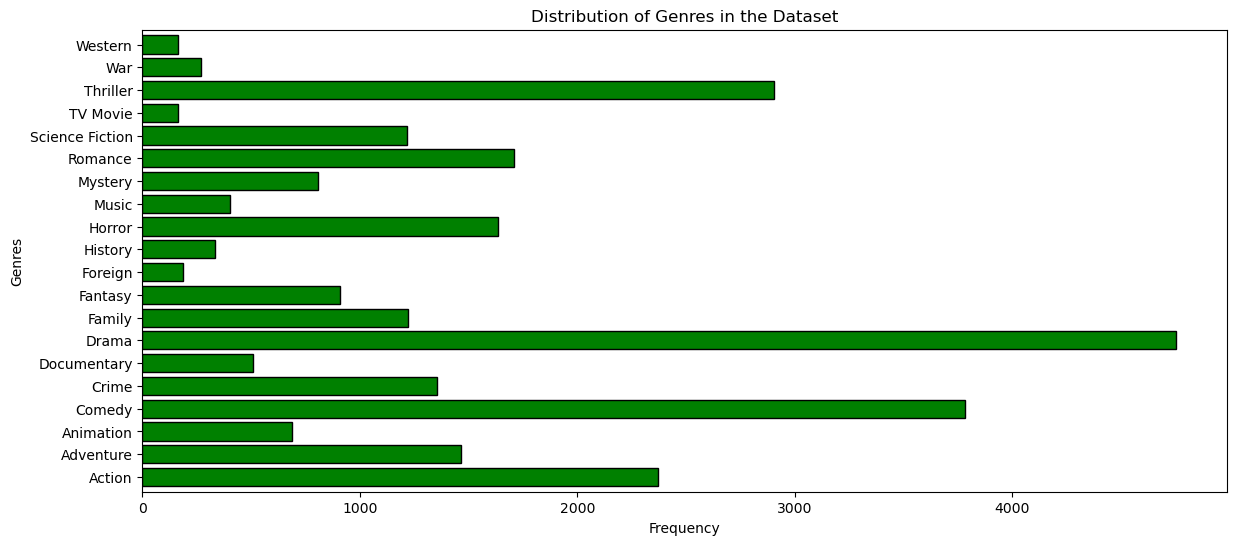

In [37]:
# Plot the genre distribution on a horizontal bar chart
genres_by_freq = tmdb_data.genre.value_counts().sort_index()

genres_by_freq.plot(
    kind='barh',
    color='green',
    edgecolor='black',
    figsize=[14, 6],
    rot=0,
    width=0.8,
    title='Distribution of Genres in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Genres');

In [38]:
# Print the five genres dominating the 
print('The five genres dominating the movie industry are:')
for i in genres_by_freq.nlargest(5).index:
    print(i)

The five genres dominating the movie industry are:
Drama
Comedy
Thriller
Action
Romance


#### 2. Are these genres making most of the profits in the movie industry?

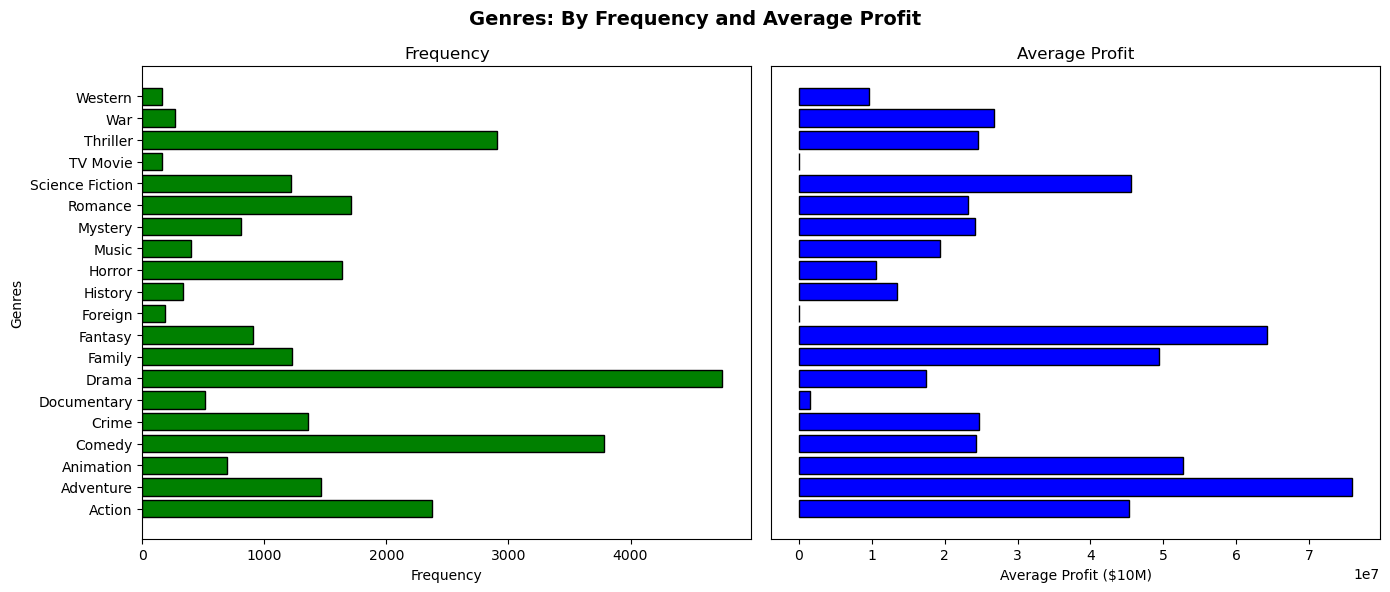

In [70]:
# First, I need to calculate the profit for each record
# Record Profit = Record Revenue - Record Budget
tmdb_data['profit'] = tmdb_data['revenue'] - tmdb_data['budget']

# Then calculate the average profit per genre
genres_by_profit = tmdb_data.groupby('genre').profit.mean()

# Now display two bar charts:
# 1. Showing the genres by frequency in the movie industry
# 2. Showing the genres by profit in the movie industry
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Genres: By Frequency and Average Profit', weight='bold', fontsize=14)

# First chart
ax1.barh(genres_by_freq.index, genres_by_freq.values, color='green', edgecolor='black')
ax1.set_title('Frequency')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Genres')

# Second chart
ax2.barh(genres_by_profit.index, genres_by_profit.values, color='blue', edgecolor='black')
ax2.set_title('Average Profit')
ax2.set_xlabel('Average Profit ($10M)')
# Remove tick labels since they share the same genres
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.set_ylabel('')

plt.tight_layout();

Only two after out of five showed up in the lower half of the top 10 genres by profit.

**No. The top 5 genres with more movie counts are not making most of the profit in the industry. Action, Thriller and Comedy are profitable but not the most profitable**

#### 3. Are these genres the most popular?

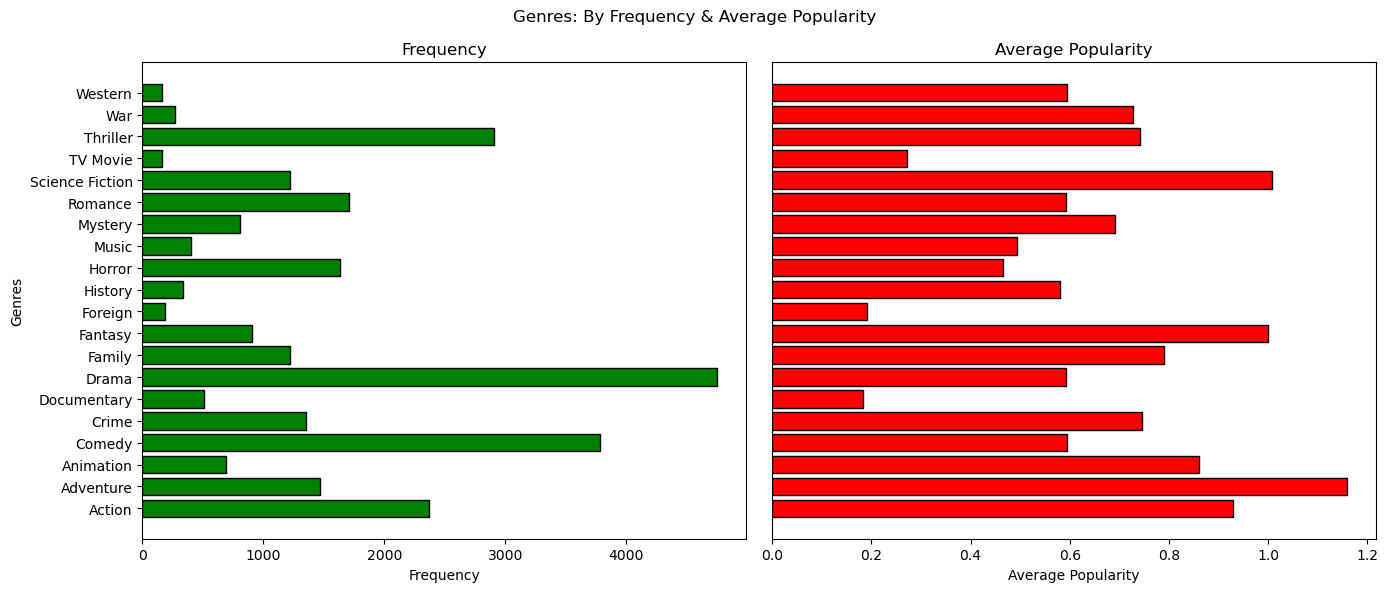

In [65]:
# Calculate the mean popularity for the genres and select the top 10 genres
genres_by_popularity = tmdb_data.groupby('genre').popularity.mean()

# Now display two bar charts:
# 1. Showing the genres by frequency in the movie industry
# 2. Showing the genres by popularity in the movie industry
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle('Genres: By Frequency & Average Popularity')

# First chart
ax3.barh(genres_by_freq.index, genres_by_freq.values, color='green', edgecolor='black')
ax3.set_title('Frequency')
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Genres')

# Second chart
ax4.barh(genres_by_popularity.index, genres_by_popularity.values, color='red', edgecolor='black')
ax4.set_title('Average Popularity')
ax4.set_xlabel('Average Popularity')
# Remove tick labels since they share the same genres
ax4.set_ylabel('')
ax4.set_yticks([])
ax4.set_yticklabels([])

plt.tight_layout();

Action and Thriller are popular as they show up in the top 10 popular genres. But are not the most popular

**No. The five genres leading by movie counts are not the most popular in the movie industry**

#### 4. Which attribute(s) go with popularity of a movie?

In [71]:
# Let's see the correlation matrix between the attributes
tmdb_data.corr()

/tmp/ipykernel_1859/2656146912.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmdb_data.corr()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
popularity,1.000000,0.541345,0.665618,0.144828,0.794793,0.235715,0.111335,0.632230
budget,0.541345,1.000000,0.729263,0.204388,0.641505,0.102997,0.149237,0.564187
revenue,0.665618,0.729263,1.000000,0.174608,0.798543,0.197071,0.082103,0.976376
runtime,0.144828,0.204388,0.174608,1.000000,0.177406,0.167369,-0.134019,0.146150
vote_count,0.794793,0.641505,0.798543,0.177406,1.000000,0.281358,0.132393,0.760997
vote_average,0.235715,0.102997,0.197071,0.167369,0.281358,1.000000,-0.127868,0.205275
release_year,0.111335,0.149237,0.082103,-0.134019,0.132393,-0.127868,1.000000,0.051943
profit,0.632230,0.564187,0.976376,0.146150,0.760997,0.205275,0.051943,1.000000


/tmp/ipykernel_1859/3367837336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tmdb_data.corr(), cmap='YlGnBu', linewidths=0.30, annot=True);


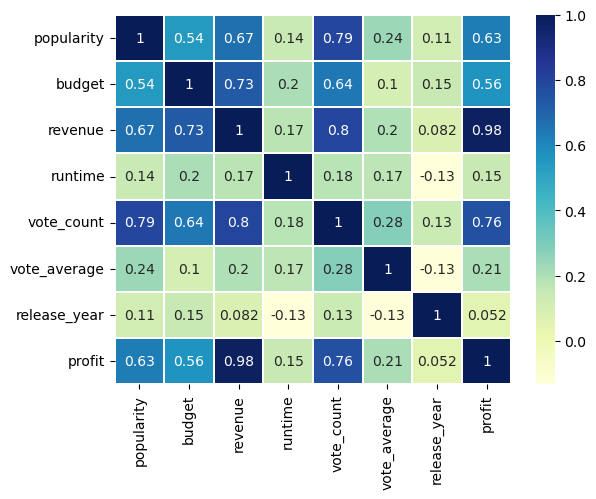

In [72]:
# Visualize the matrix with a heatmap for better interpretation
sns.heatmap(tmdb_data.corr(), cmap='YlGnBu', linewidths=0.30, annot=True);

Popularity attribute correlates positively with the number of votes for that particular movie. The more the number of votes for a movie the popular it gets.

Popularity attribute also correlates positively with the budget, revenue and profit. Meaning investing more on a movie will make it popular as streamers will enjoy the quality of the movie

Attributes like average vote, release year and runtime doesn't really have any effect on the popularity of a movie

#### 5. Which 5 directors would you recommend to your friend? And why?

Let's see the relationship between profit and popularity

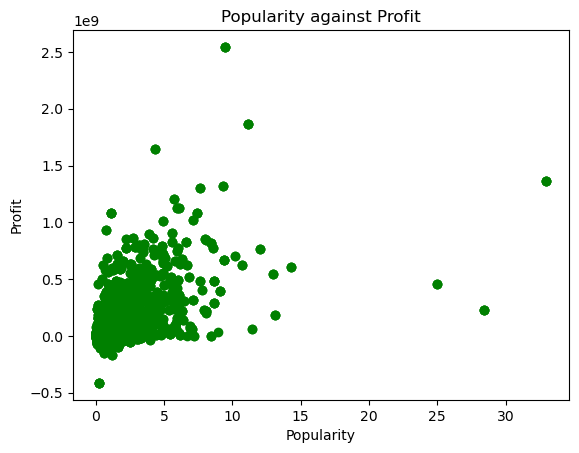

In [73]:
# Plot a scatter plot showing the relationship between the popularity and profit a movie
plt.scatter(tmdb_data.popularity, tmdb_data.profit, color='green')
plt.title('Popularity against Profit')
plt.xlabel('Popularity')
plt.ylabel('Profit');

I can see from my previous analysis that popularity and profit goes hand in hand. My friend will want a director that'll grant him both popularity and profit. So I'll be diving into those two categories specifically.

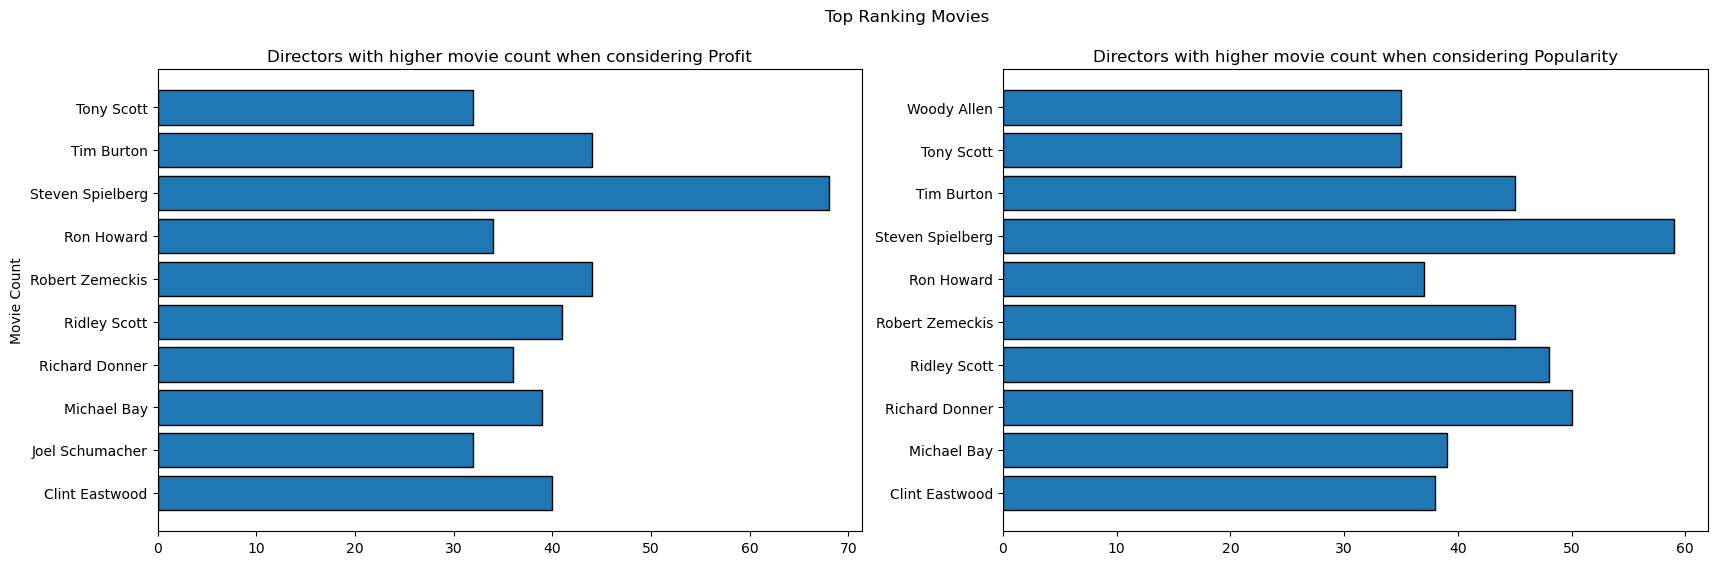

In [85]:
# Get the top ranking movies data by popularity
top_movies_data_by_popularity = tmdb_data[tmdb_data.popularity > tmdb_data.popularity.mean()]

# Get the top ranking movies data by profit
top_movies_data_by_profit = tmdb_data[tmdb_data.profit > tmdb_data.profit.mean()]

# Display two plots of directors with more movie counts int the two categories
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(20, 6))

fig.suptitle('Top Ranking Movies')

profit_data = top_movies_data_by_profit.groupby('director').director.count().nlargest(10).sort_index()
ax5.set_title('Directors with higher movie count when considering Profit')
ax5.barh(profit_data.index, profit_data.values, edgecolor='black')
ax5.set_ylabel('Movie Count')

popularity_data = top_movies_data_by_popularity.groupby('director').director.count().nlargest(10).sort_index()
ax6.set_title('Directors with higher movie count when considering Popularity')
ax6.barh(popularity_data.index, popularity_data.values, edgecolor='black')

plt.show()

- The first 4 directors with higher movie count when considering profit are the ones with more more popularity.
- Clint Eastwood being the fifth when considering profit is also part of the top 10 when considering popularity.

Prioritizing Profit over popularity, I'll recommend the first five directors with more movie counts when considering profit to my friend.

**I'll recommend *Steven Spielberg, Robert Zenneckis, Tim Burton, Ridley Scott and Clint Eastwood* to my friend because the movies directed by these directors have more profit than any other and their movies are very popular.**

<a id='conclusions'></a>
## Conclusions

- The top 5 genres in the movie industry are *Drama, Comedy, Thriller, Action, Romance*.
- These genres are neither the most popular nor the most profitable genre in the movie industry.
- Adventure is the most popular and the most profitable genre in the movie industry.
- Profit of a particular movie increases as it gets popular.
- The runtime, release year and average vote have nothing to do with how popular a movie gets.
- But the number of votes a movie gets deeply affect it's popularity
- The 5 best directors that I recommend in the industry are **Steven Spielberg, Robert Zenneckis, Tim Burton, Ridley Scott and Clint Eastwood**

### Limitation

The main limitation to this dataset is that it didn't cover all the movies in the world and all timeframe as it only contain movies from 1960 to 2015.